<a href="https://colab.research.google.com/github/bigirimanainnocent12/Regresion_lineaire/blob/main/CODE_RAPPORT_DE_STAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

try:
    latence= pd.read_excel('/content/Phase latence.xlsx')
    display(latence.head())
except FileNotFoundError:
    print("Error: 'example.xlsx' not found. Please ensure the file exists in the current directory.")
    latence = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    latence = None

,Fermenteur,debut_experience,Souche,Operateur,Milieu,Temps,T°C,Csg T,Poids,Volume,CO2,FinPhas,Vinst,Csg V,V11,V5,Acc G,Tps inject.,Code
0,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.00,18,18,1686.72,1.0,0.42,inf,0.12,inf,0.053,0.060,0.004,0,10 01/10/2020 09:59:00
1,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.33,18,18,1686.70,1.0,0.44,inf,0.06,inf,0.054,0.078,0.004,0,10 01/10/2020 09:59:00
2,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.67,18,18,1686.70,1.0,0.44,inf,0.00,inf,0.052,0.066,0.004,0,10 01/10/2020 09:59:00
3,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,30.00,18,18,1686.64,1.0,0.50,inf,0.18,inf,0.059,0.078,0.004,0,10 01/10/2020 09:59:00
4,10,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,30.33,18,18,1686.62,1.0,0.52,inf,0.06,inf,0.063,0.078,0.005,0,10 01/10/2020 09:59:00


In [ ]:
import numpy as np

# Drop columns with a single unique value
for col in ['Fermenteur', 'Tps inject.']:
    if col in latence.columns:
        latence.drop(columns=col, inplace=True)

# Replace infinite values with NaN
for col in ['FinPhas', 'Csg V']:
    if col in latence.columns:
        latence[col] = latence[col].replace([np.inf, -np.inf], np.nan)

# Remove columns with a high percentage of missing values (e.g., >90%)
threshold = 0.9
for col in latence.columns:
  if latence[col].isnull().sum() / len(latence) > threshold:
    latence.drop(columns=col, inplace=True)


# Convert discretized numerical features to categorical (example with 'Volume' as it's likely discretized)
for col in ['T°C', 'Csg T', 'Volume']:
    if col in latence.columns:
        if latence[col].nunique() < 10: # Consider a column discretized if it has less than 10 unique values. Adjust as needed.
            latence[col] = latence[col].astype('category')

display(latence.head())


,debut_experience,Souche,Operateur,Milieu,Temps,T°C,Csg T,Poids,Volume,CO2,Vinst,V11,V5,Acc G,Code
0,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.00,18,18,1686.72,1.0,0.42,0.12,0.053,0.060,0.004,10 01/10/2020 09:59:00
1,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.33,18,18,1686.70,1.0,0.44,0.06,0.054,0.078,0.004,10 01/10/2020 09:59:00
2,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,29.67,18,18,1686.70,1.0,0.44,0.00,0.052,0.066,0.004,10 01/10/2020 09:59:00
3,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,30.00,18,18,1686.64,1.0,0.50,0.18,0.059,0.078,0.004,10 01/10/2020 09:59:00
4,2020-10-01 09:59:00,4010291G,LCa,Sauvignon,30.33,18,18,1686.62,1.0,0.52,0.06,0.063,0.078,0.005,10 01/10/2020 09:59:00


In [ ]:
latence.drop(columns=['debut_experience','T°C','Volume','Operateur','Vinst','Acc G','Acc G','Csg T',"V5",'Poids'],inplace=True)

In [ ]:
latence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Souche  99 non-null     object 
 1   Milieu  99 non-null     object 
 2   Temps   99 non-null     float64
 3   CO2     99 non-null     float64
 4   V11     99 non-null     float64
 5   Code    99 non-null     object 
dtypes: float64(3), object(3)
memory usage: 4.8+ KB


In [ ]:
latence['Souche'].unique()

array(['4010291G', '722 + FO 20+20', 'VRB e2'], dtype=object)

In [ ]:
latence.groupby('Souche')['V11'].describe()

,count,mean,std,min,25%,50%,75%,max
Souche,,,,,,,,
4010291G,32.0,0.239531,0.162340,0.052,0.08975,0.210,0.3695,0.535
722 + FO 20+20,30.0,0.300900,0.166808,0.064,0.14100,0.309,0.4420,0.571
VRB e2,37.0,0.215973,0.127662,0.047,0.09400,0.199,0.3130,0.462


In [ ]:
latence['Souche'].value_counts()

,count
Souche,
VRB e2,37
4010291G,32
722 + FO 20+20,30


In [ ]:
data_latence=latence[latence['Souche']=='VRB e2']
data_latence.head()

,Souche,Milieu,Temps,CO2,V11,Code
62,VRB e2,Chardo PR 16,18.33,0.400,0.047,10 01/06/2017 17:09:00
63,VRB e2,Chardo PR 16,18.67,0.382,0.051,10 01/06/2017 17:09:00
64,VRB e2,Chardo PR 16,19.00,0.418,0.059,10 01/06/2017 17:09:00
65,VRB e2,Chardo PR 16,19.33,0.455,0.066,10 01/06/2017 17:09:00
66,VRB e2,Chardo PR 16,20.00,0.509,0.073,10 01/06/2017 17:09:00


# **Statistique descriptive**

In [ ]:
data_latence['V11'].describe()

,V11
count,37.000000
mean,0.215973
std,0.127662
min,0.047000
25%,0.094000
50%,0.199000
75%,0.313000
max,0.462000


# **Nuage des points**

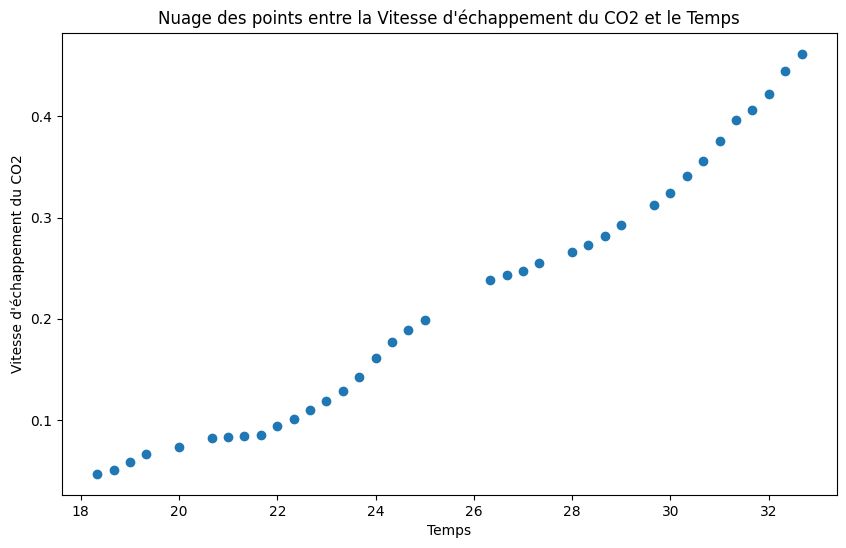

In [ ]:
import matplotlib.pyplot as plt
figsize = (10, 6)
plt.figure(figsize=figsize)
plt.scatter(data_latence['Temps'],data_latence['V11'])
plt.xlabel('Temps')
plt.ylabel("Vitesse d'échappement du CO2")
plt.title("Nuage des points entre la Vitesse d'échappement du CO2 et le Temps")
plt.show()

# **Régression linéaire entre la Vitesse d'échappement du CO2 et le Temps**

In [ ]:
import statsmodels.formula.api as sm

modele=sm.ols('V11 ~ Temps',data=data_latence).fit()
print(modele.summary())

                            OLS Regression Results                            
Dep. Variable:                    V11   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1330.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           1.94e-29
Time:                        13:09:14   Log-Likelihood:                 91.941
No. Observations:                  37   AIC:                            -179.9
Df Residuals:                      35   BIC:                            -176.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5124      0.020    -25.289      0.0

# **Test de Shapiro-wilk**

Le test de Shapiro-Wilk est un test statistique utilisé pour évaluer si un échantillon de données
suit une distribution normale. Les hypothèses du test sont les suivantes:

➢ $H_0$ : L’échantillon est issu d’une population normalement distribuée.

➢ $H_1$ : L’échantillon n’est pas issu d’une population normalement distribuée

In [ ]:
from scipy import stats
residus=modele.resid
statistic, pvalue=stats.shapiro(residus)
model={
    "Test":["Shapiro-Wilk"],
    "Statistique":[statistic],
    "Valeur p":[pvalue]
}
pd.DataFrame(model)

,Test,Statistique,Valeur p
0,Shapiro-Wilk,0.994598,0.565548


<Figure size 2000x1000 with 0 Axes>

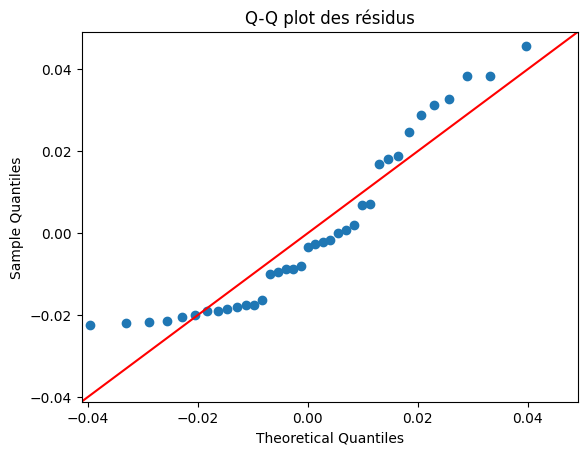

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
figsize = (20, 10)
plt.figure(figsize=figsize)
sm.qqplot(residus,loc=residus.mean(),scale=residus.std(),line='45')
plt.title('Q-Q plot des résidus')
plt.show()

# **Homoscédasticité des Résidus**

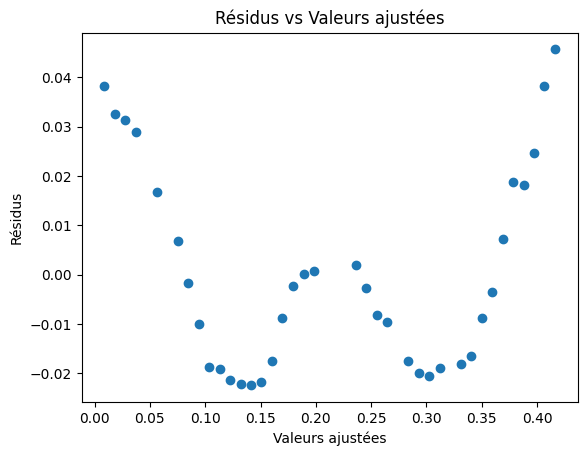

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(modele.fittedvalues,modele.resid)
plt.title('Résidus vs Valeurs ajustées')
plt.xlabel('Valeurs ajustées')
plt.ylabel('Résidus')
plt.show()

# *Test de Breusch-Pagan*

Le test de Breusch-Pagan est un test statistique utilisé pour détecter l'hétéroscédasticité dans un modèle de régression linéaire. L'hétéroscédasticité se produit lorsque la variance des erreurs n'est pas constante à travers les valeurs des variables indépendantes, ce qui peut rendre les résultats de la régression peu fiables.

# Hypothèses du Test
$H_0$: Homoscédasticité (les résidus ont une variance constante).

$H_1$: Hétéroscédasticité (les résidus n'ont pas une variance constante).

# Étapes du Test de Breusch-Pagan

* Ajustement du modèle de régression : Ajustez le modèle de régression linéaire initial et obtenez les résidus.

* Calcul des résidus au carré : Calculez les résidus au carré du modèle ajusté.

* Régression auxiliaire : Effectuez une régression des résidus au carré sur les variables indépendantes du modèle initial.

* Calcul de la statistique du test : La statistique du test est calculée comme suit :
$χ^2$=n*$R_{nouveau}^2$

où:
n est le nombre d'observations et $R_{nouveau}^2$ est le coefficient de détermination de la régression auxiliaire.

In [ ]:
import pandas as pd
# Test de Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan
# Use all residuals instead of just the head
bp_test = het_breuschpagan(modele.resid, modele.model.exog)
labels = ['Statistique LM', 'p-value', 'Statistique F', 'p-value F']  # Define labels for bp_test results
d = dict(zip(labels, bp_test))
ide = ["Test de Breusch-Pagan"]  # Put the index label in a list
df = pd.DataFrame([d], index=ide)  # Create a DataFrame with a single row
display(df)

,Statistique LM,p-value,Statistique F,p-value F
Test de Breusch-Pagan,0.002595,0.95937,0.002455,0.960763


La statistque du est égalé à 0.002595, Sous $H_O$, cette statistique suit la loi des Khi- deux à 1 dégre de liberté. La pvalue est de 0.95937 qui est largement superieur au seuil de 5%. Donc nous acceptons $H_0$ et nous cocluons que les résidus sont homoscédastique.

# **Equation du modèle**

$Y_i$=0.5124-0.0284*$X_i$+$\epsilon_i$



# **La fin latence**

In [ ]:
0.5124/0.0284

18.04225352112676

# **Fin_fermenation**

In [82]:
import pandas as pd

try:
    fermenation= pd.read_excel('/content/DONNEES.xlsx')
    display(fermenation.head())
except FileNotFoundError:
    print("Error: 'example.xlsx' not found. Please ensure the file exists in the current directory.")
    fermenation = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    fermenation = None

,Fermenteur,debut_experience,Souche,Operateur,Milieu,Temps,T°C,Csg T,Poids,Volume,CO2,FinPhas,Vinst,Csg V,V11,V5,Acc G,Tps inject.,Smoothed_V11
0,14,2021-06-03 16:11:00,Fresco angel,LCa,MSN460 S230-FA,14.33,15,15,1713.84,1.0,-0.16,inf,-1.74,inf,-0.022,-0.168,-0.002,0,0.162253
1,14,2021-06-03 16:11:00,Fresco angel,LCa,MSN460 S230-FA,45.00,15,15,1712.30,1.0,1.38,inf,1.20,inf,0.105,0.258,-0.002,0,0.162253
2,14,2021-06-03 16:11:00,Fresco angel,LCa,MSN460 S230-FA,58.33,15,15,1711.24,1.0,2.44,inf,-1.38,inf,0.111,-0.072,-0.002,0,0.162253
3,14,2021-06-03 16:11:00,Fresco angel,LCa,MSN460 S230-FA,70.67,15,15,1708.76,1.0,4.92,inf,-1.68,inf,0.188,0.078,-0.002,0,0.162253
4,14,2021-06-03 16:11:00,Fresco angel,LCa,MSN460 S230-FA,88.00,15,15,1703.54,1.0,10.14,inf,-0.66,inf,0.319,0.258,-0.002,0,0.162253


In [83]:
fermenation.drop(columns=['Fermenteur','FinPhas','Smoothed_V11','Csg V','Tps inject.','debut_experience','T°C','Volume','Operateur','Vinst','Acc G','Acc G','Csg T',"V5",'Poids'],inplace=True)

In [84]:
fermenation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7270 entries, 0 to 7269
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Souche  7270 non-null   object 
 1   Milieu  7270 non-null   object 
 2   Temps   7270 non-null   float64
 3   CO2     7270 non-null   float64
 4   V11     7270 non-null   float64
dtypes: float64(3), object(2)
memory usage: 284.1+ KB


In [85]:
data=fermenation[fermenation['Souche']=='VRB e2']
data.head()

,Souche,Milieu,Temps,CO2,V11
6096,VRB e2,Chardo PR 16,0.00,0.000,0.000
6097,VRB e2,Chardo PR 16,0.33,0.000,0.000
6098,VRB e2,Chardo PR 16,10.00,0.091,0.005
6099,VRB e2,Chardo PR 16,10.33,0.109,0.012
6100,VRB e2,Chardo PR 16,112.33,62.000,0.542


In [86]:
maxco2=data['CO2'].max()
maxCO295=maxco2*0.95
maxCO2995=maxco2*0.995

In [87]:
datafiltre=data[(data['CO2']>=maxCO295) & (data['CO2']<=maxCO2995)]
datafiltre=datafiltre.reset_index(drop=True)
datafiltre.head()

,Souche,Milieu,Temps,CO2,V11
0,VRB e2,Chardo PR 16,303.67,107.067,0.111
1,VRB e2,Chardo PR 16,304.00,107.122,0.116
2,VRB e2,Chardo PR 16,304.67,107.159,0.110
3,VRB e2,Chardo PR 16,305.00,107.233,0.114
4,VRB e2,Chardo PR 16,310.33,107.766,0.102


In [88]:
datafiltre['V11'].describe()

,V11
count,264.000000
mean,0.056667
std,0.032534
min,0.004000
25%,0.026000
50%,0.053000
75%,0.085250
max,0.118000


Nuage des points

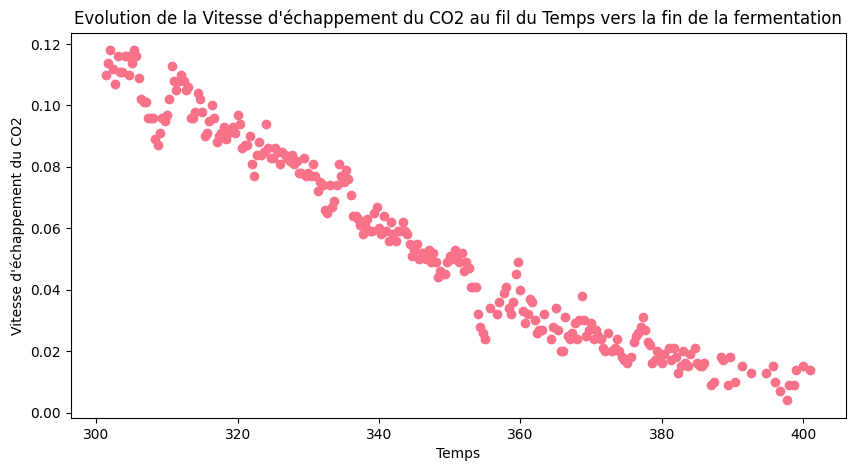

In [89]:
import matplotlib.pyplot as plt
figsize = (10, 5)
plt.figure(figsize=figsize)
plt.scatter(datafiltre['Temps'],datafiltre['V11'])
plt.xlabel('Temps')
plt.ylabel("Vitesse d'échappement du CO2")
plt.title("Evolution de la Vitesse d'échappement du CO2 au fil du Temps vers la fin de la fermentation")
plt.show()

# **Régression linéaire entre V11 et Temps**

In [90]:
import statsmodels.formula.api as sm
mode=sm.ols(data=datafiltre,formula='V11 ~ Temps').fit()
print(mode.summary())

                            OLS Regression Results                            
Dep. Variable:                    V11   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     5329.
Date:                Mon, 26 May 2025   Prob (F-statistic):          3.80e-176
Time:                        11:21:03   Log-Likelihood:                 934.22
No. Observations:                 264   AIC:                            -1864.
Df Residuals:                     262   BIC:                            -1857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4625      0.006     82.941      0.0

# **Test de Shapiro-Wilk**

In [91]:
from scipy import stats
residu=mode.resid
statistic, pvalue=stats.shapiro(residu)
model={
    "Test":["Shapiro-Wilk"],
    "Statistique":[statistic],
    "Valeur p":[pvalue]
}
pd.DataFrame(model)

,Test,Statistique,Valeur p
0,Shapiro-Wilk,0.993727,0.339859


In [ ]:
figsize = (10, 7)
plt.figure(figsize=figsize)
sm.qqplot(residu,loc=residu.mean(),scale=residu.std(),line='45')
plt.title('Q-Q plot des résidus')
plt.show()

<ipython-input-118-f0fe7b635714>:59: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-118-f0fe7b635714>:60: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('test_normality.png')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


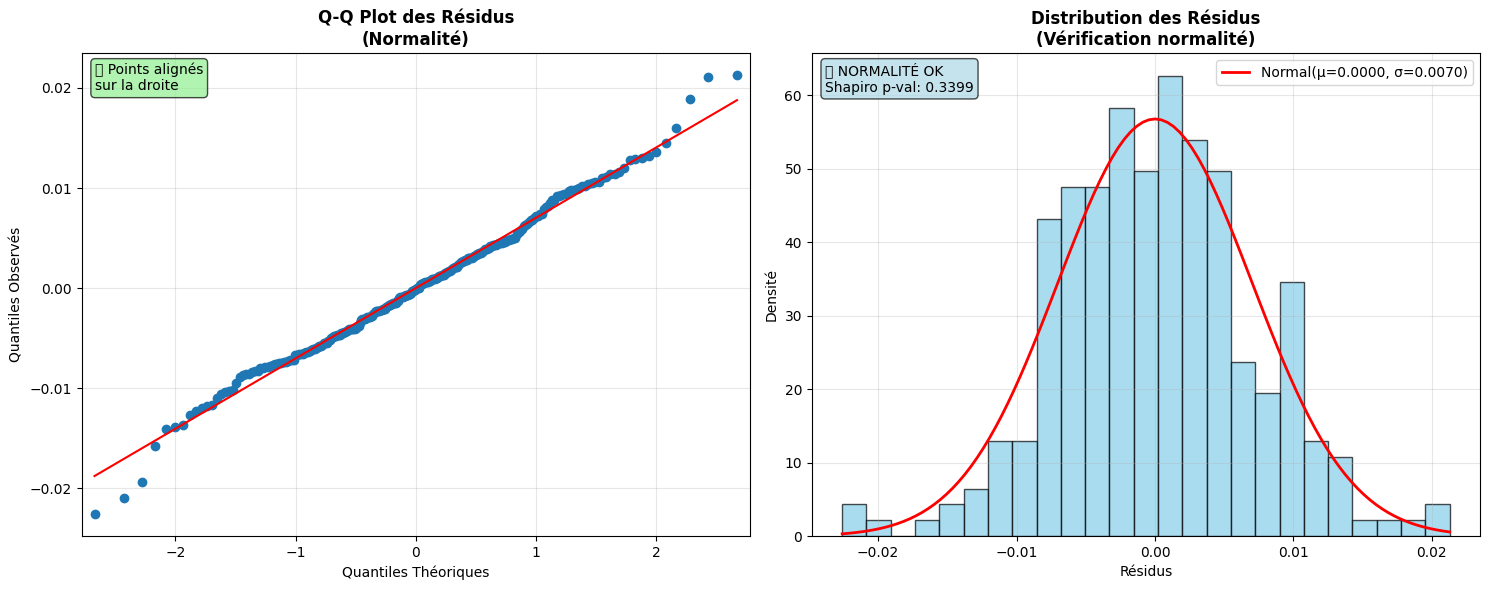

In [118]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('default')


# Structure 1x2 pour deux graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# =============================================================================
# GRAPHIQUE 1: Q-Q PLOT DES RÉSIDUS (POSITION 0)
# =============================================================================

# Q-Q plot avec statsmodels
sm.qqplot(mode.resid, line='s', ax=axes[0])
axes[0].set_title('Q-Q Plot des Résidus\n(Normalité)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Quantiles Théoriques')
axes[0].set_ylabel('Quantiles Observés')
axes[0].grid(True, alpha=0.3)

# Test de normalité (Shapiro-Wilk)
shapiro_stat, shapiro_pvalue = stats.shapiro(mode.resid)

# Ajout d'une interprétation
if shapiro_pvalue > 0.05:
    interpretation_qq = "✅ Points alignés\nsur la droite"
else:
    interpretation_qq = "⚠️ Déviations\nnotables"
axes[0].text(0.02, 0.98, f"{interpretation_qq}",
             transform=axes[0].transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))


# =============================================================================
# GRAPHIQUE 2: DISTRIBUTION DES RÉSIDUS (POSITION 1)
# =============================================================================

axes[1].hist(mode.resid, bins=25, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[1].set_title('Distribution des Résidus\n(Vérification normalité)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Résidus')
axes[1].set_ylabel('Densité')
axes[1].grid(True, alpha=0.3)

# Superposition de la courbe normale théorique
mu, sigma = np.mean(mode.resid), np.std(mode.resid)
x_norm = np.linspace(mode.resid.min(), mode.resid.max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)
axes[1].plot(x_norm, y_norm, 'r-', linewidth=2, label=f'Normal(μ={mu:.4f}, σ={sigma:.4f})')
axes[1].legend()

if shapiro_pvalue > 0.05:
    interpretation_dist = "✅ NORMALITÉ OK"
else:
    interpretation_dist = "⚠️ NON-NORMALITÉ"

axes[1].text(0.02, 0.98, f"{interpretation_dist}\nShapiro p-val: {shapiro_pvalue:.4f}",
             transform=axes[1].transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.savefig('test_normality.png')
plt.show()

# **Homoscédasticité des Résidus**


🎨 TESTS GRAPHIQUES POUR L'HÉTÉROSCÉDASTICITÉ


<ipython-input-129-ff824d2bb320>:105: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-129-ff824d2bb320>:106: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('TESTS GRAPHIQUES POUR LHÉTÉROSCÉDASTICITÉ.png')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


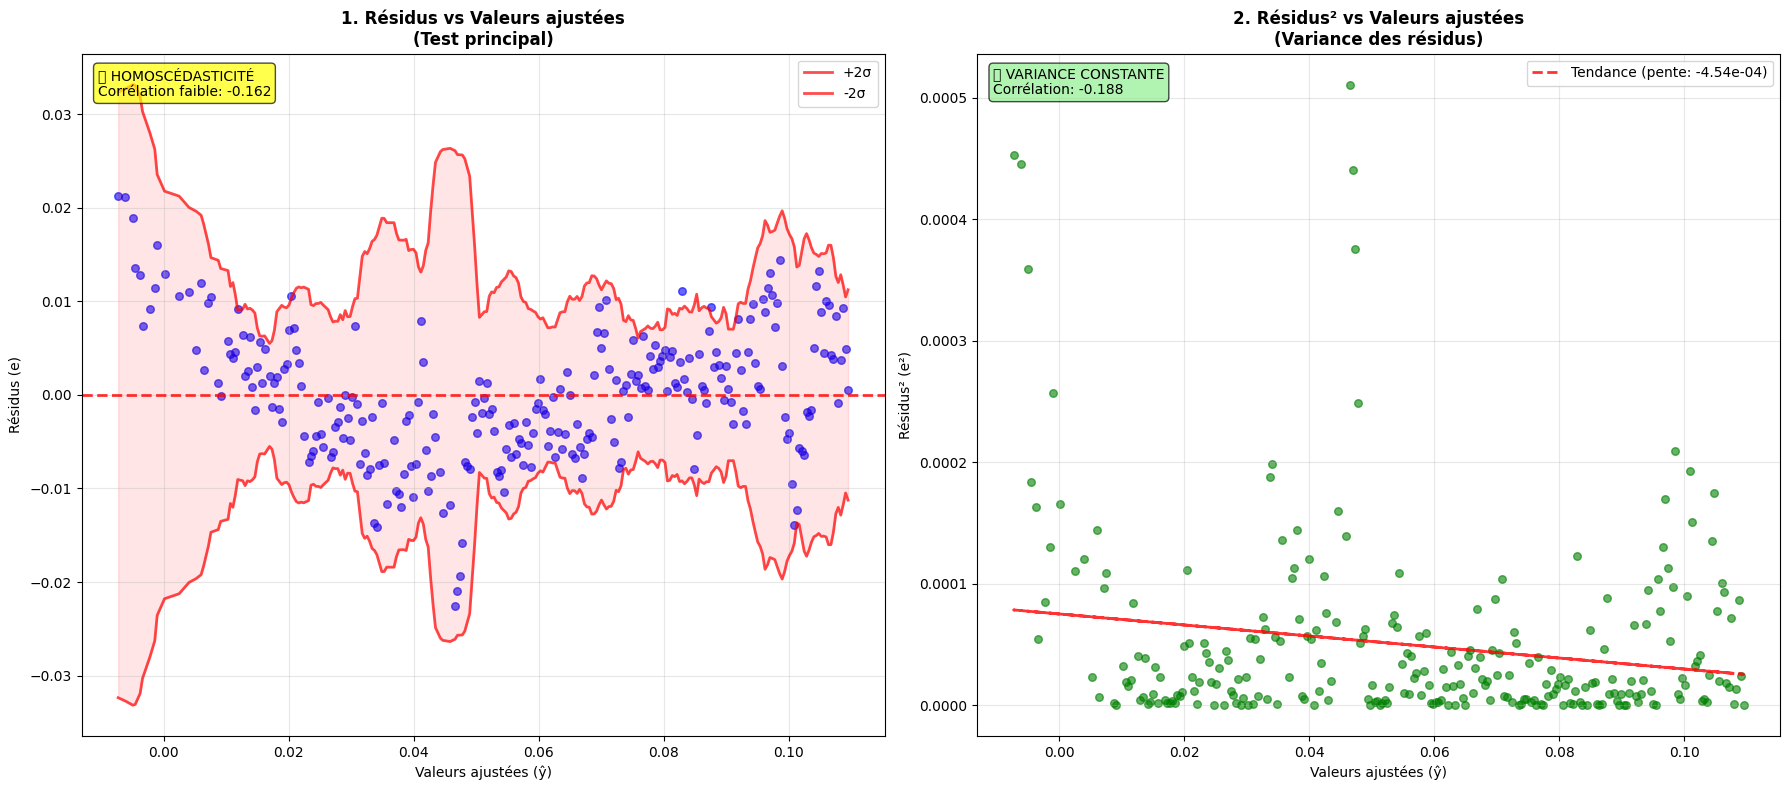

In [129]:
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.ndimage import uniform_filter1d

# =============================================================================
# TON MODÈLE DE RÉGRESSION
# =============================================================================

# Estimation du modèle
mode = sm.ols(data=datafiltre, formula='V11 ~ Temps').fit()


# =============================================================================
# TESTS GRAPHIQUES POUR L'HÉTÉROSCÉDASTICITÉ
# =============================================================================

print("\n" + "="*60)
print("🎨 TESTS GRAPHIQUES POUR L'HÉTÉROSCÉDASTICITÉ")
print("="*60)

# Configuration du style
plt.style.use('default')
sns.set_palette("husl")

# Création de la figure avec 2 sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # Ajusté la hauteur

# =============================================================================
# GRAPHIQUE 1: RÉSIDUS vs VALEURS AJUSTÉES (LE PLUS IMPORTANT)
# =============================================================================

axes[0].scatter(mode.fittedvalues, mode.resid, alpha=0.6, color='blue', s=30)
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.8)
axes[0].set_title('1. Résidus vs Valeurs ajustées\n(Test principal)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Valeurs ajustées (ŷ)')
axes[0].set_ylabel('Résidus (e)')
axes[0].grid(True, alpha=0.3)

# Calcul de l'enveloppe de variance
n = len(mode.resid)
window_size = max(10, n//20)

# Trier par valeurs ajustées pour l'enveloppe
sorted_indices = np.argsort(mode.fittedvalues)
fitted_sorted = mode.fittedvalues.iloc[sorted_indices] if hasattr(mode.fittedvalues, 'iloc') else mode.fittedvalues[sorted_indices]
resid_sorted = mode.resid.iloc[sorted_indices] if hasattr(mode.resid, 'iloc') else mode.resid[sorted_indices]

# Variance mobile (lissée)
variance_mobile = uniform_filter1d(resid_sorted**2, size=window_size)
std_mobile = np.sqrt(variance_mobile)

# Enveloppe ±2σ
axes[0].plot(fitted_sorted, 2*std_mobile, 'r-', alpha=0.7, linewidth=2, label='+2σ')
axes[0].plot(fitted_sorted, -2*std_mobile, 'r-', alpha=0.7, linewidth=2, label='-2σ')
axes[0].fill_between(fitted_sorted, -2*std_mobile, 2*std_mobile, alpha=0.1, color='red')
axes[0].legend()

# Interprétation automatique
variance_trend = np.corrcoef(mode.fittedvalues, np.abs(mode.resid))[0,1]
if abs(variance_trend) > 0.3:
    interpretation_1 = "⚠️ HÉTÉROSCÉDASTICITÉ DÉTECTÉE"
    detail_1 = f"Corrélation |résidus|-valeurs ajustées: {variance_trend:.3f}"
else:
    interpretation_1 = "✅ HOMOSCÉDASTICITÉ"
    detail_1 = f"Corrélation faible: {variance_trend:.3f}"

axes[0].text(0.02, 0.98, f"{interpretation_1}\n{detail_1}",
               transform=axes[0].transAxes, fontsize=10,
               verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# =============================================================================
# GRAPHIQUE 2: RÉSIDUS² vs VALEURS AJUSTÉES
# =============================================================================

residus_carres = mode.resid**2
axes[1].scatter(mode.fittedvalues, residus_carres, alpha=0.6, color='green', s=30)
axes[1].set_title('2. Résidus² vs Valeurs ajustées\n(Variance des résidus)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Valeurs ajustées (ŷ)')
axes[1].set_ylabel('Résidus² (e²)')
axes[1].grid(True, alpha=0.3)

# Ligne de tendance
z = np.polyfit(mode.fittedvalues, residus_carres, 1)
p = np.poly1d(z)
axes[1].plot(mode.fittedvalues, p(mode.fittedvalues), "r--", alpha=0.8, linewidth=2,
               label=f'Tendance (pente: {z[0]:.2e})')
axes[1].legend()

# Interprétation - CORRECTION ICI
correlation_resid2 = np.corrcoef(mode.fittedvalues, residus_carres)[0, 1]  # Correction: [0,1] au lieu de [1]
if abs(correlation_resid2) > 0.2:
    interpretation_2 = "⚠️ VARIANCE NON CONSTANTE"
else:
    interpretation_2 = "✅ VARIANCE CONSTANTE"

# CORRECTION ICI: axes[1] au lieu de axes[0,1]
axes[1].text(0.02, 0.98, f"{interpretation_2}\nCorrélation: {correlation_resid2:.3f}",
               transform=axes[1].transAxes, fontsize=10,
               verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))

plt.tight_layout()
plt.savefig('TESTS GRAPHIQUES POUR LHÉTÉROSCÉDASTICITÉ.png')
plt.show()

In [60]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

white_stat = het_white(mode.resid, mode.model.exog)

d = dict(zip(labels, white_stat))
ide = ["TEST DE WHITE"]
df = pd.DataFrame([d], index=ide)
display(df)

,Statistique LM,p-value,Statistique F,p-value F
TEST DE WHITE,26.41441,0.000002,14.508795,0.000001


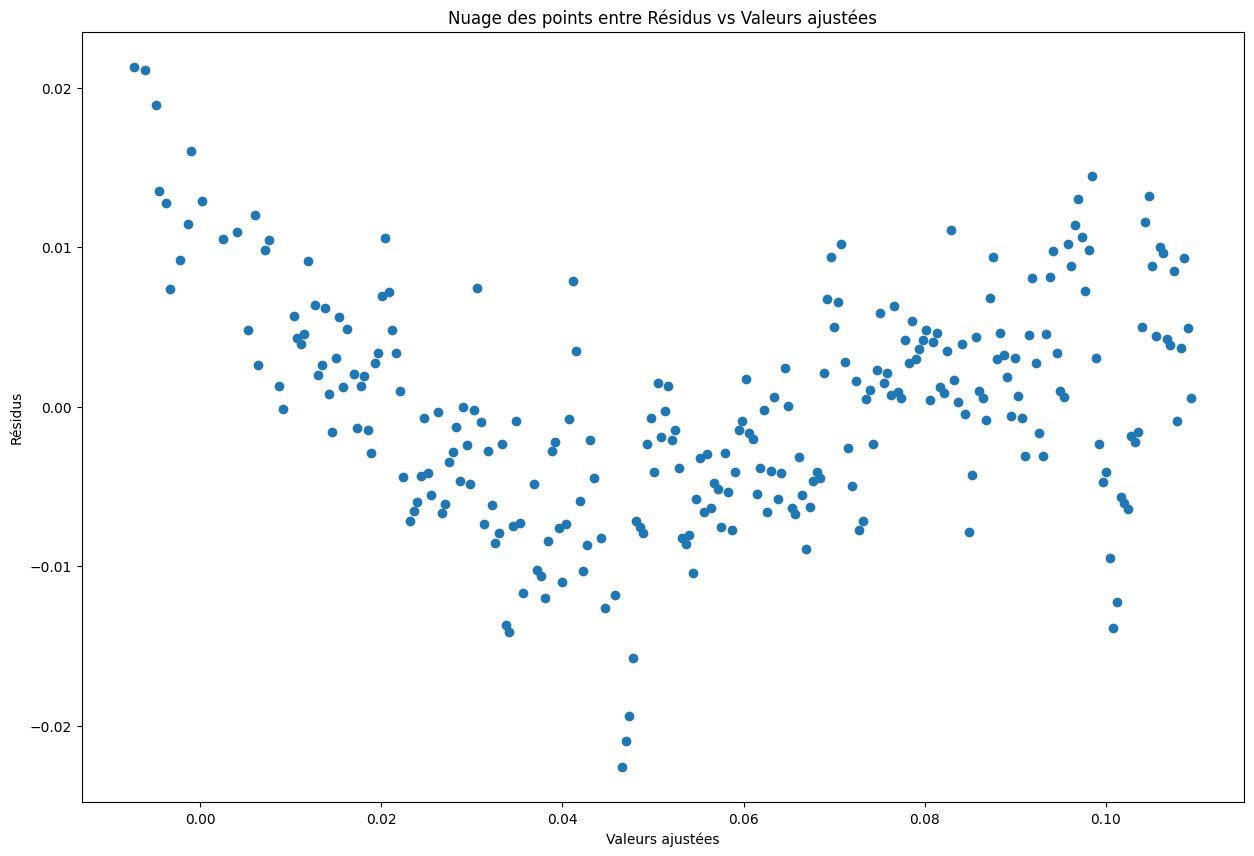

In [44]:
import matplotlib.pyplot as plt
figsize=( 15,10)
plt.figure(figsize=figsize)
plt.scatter(mode.fittedvalues,mode.resid)
plt.title('Nuage des points entre Résidus vs Valeurs ajustées')
plt.xlabel('Valeurs ajustées')
plt.ylabel('Résidus')
plt.show()

# **Test de Breusch-Pagan**

In [45]:
import pandas as pd
# Test de Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan
# Use all residuals instead of just the head
bp_test = het_breuschpagan(mode.resid, mode.model.exog)
labels = ['Statistique LM', 'p-value', 'Statistique F', 'p-value F']  # Define labels for bp_test results
d = dict(zip(labels, bp_test))
ide = ["Test de Breusch-Pagan"]  # Put the index label in a list
df = pd.DataFrame([d], index=ide)  # Create a DataFrame with a single row
display(df)

,Statistique LM,p-value,Statistique F,p-value F
Test de Breusch-Pagan,9.305813,0.002284,9.572747,0.002189


# **Fin Fermentation**

In [49]:
0.4625 /0.00115

402.1739130434783